<h1>Tourney Analysis</h1>

This tool provides the player with a high-level analysis of their tournament performance.
Author: Muna N (#INF)

<h3>Setup</h3>

In [4]:
#primary import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [5]:
offline_flag = input("Please select 'Offline' for offline data only, or 'Tourney' for online and offline results:")
df = pd.read_excel(offline_flag + " " "Data.xlsx")

Please select 'Offline' for offline data only, or 'Tourney' for online and offline results: Offline


In [6]:
df.head()

,Unnamed: 0,Tournament,Placement,Participants,DQ_Wins,Winning_Sets,Losing_Sets,Games_Won,Games_Lost,Game_3+,Sweeps,Chars_Won,Chars_Lost,Chars_All,Tourney_Win,Offline,Top_8
0,100,101,7,22,0,3,2,7,5,2,3,"Joker, Lucario, Mario, Steve","Link, Corrin","Joker, Lucario, Mario, Steve, Link, Corrin",0,1,1
1,101,102,3,19,0,4,2,10,8,4,2,"Roy, King K Rool, Mr. Game & Watch, Yoshi, Zelda","Snake, Diddy Kong, Captain Falcon","Roy, King K Rool, Mr. Game & Watch, Yoshi, Zel...",0,1,1
2,102,103,4,15,0,3,2,8,6,4,1,"Duck Hunt, Lucario, Zelda, Pyra/Mythra","Captain Falcon, Yoshi","Duck Hunt, Lucario, Zelda, Pyra/Mythra, Captai...",0,1,1
3,104,105,2,25,0,6,2,14,7,4,4,"Kazuya, Bowser, Sephiroth, Mario, Zelda, Ness,...","Yoshi, Captain Falcon","Kazuya, Bowser, Sephiroth, Mario, Zelda, Ness,...",0,1,1
4,105,106,25,64,0,2,2,4,5,1,3,"Corrin, Kirby, Pokemon Trainer","Palutena, Marth","Corrin, Kirby, Pokemon Trainer, Palutena, Marth",0,1,0


<h3>Creating Key Performance Indicators (KPIs) </h3>

In [8]:
''' 
1) Placement percentage = the proportion of the attendance pool 
you finished better than'''


df['Placement_Pct'] = 1 - df['Placement']/df['Participants']
#print(df['Placement_Pct'])

''' 
2) True Win Percentage = the number of sets you won 
divided by the total number of sets you played (wins, losses)'''

df['Set_Win_Pct'] = df['Winning_Sets']/(df['Winning_Sets'] +df['Losing_Sets'])
#print(df['True_Win_Pct'])

'''
3) Game Win Percentage = number of games you won divided by the 
total number of games you played (wins, losses)'''

df['Game_Win_Pct'] = df['Games_Won']/(df['Games_Won'] + df['Games_Lost'])
#print(df['Game_Win_Pct'])

'''
4)Set Win Ratio = the ratio between the number of sets won and the number
of sets lost'''

df['Set_Win_Rat'] = df['Winning_Sets']/(df['Losing_Sets'])
#print(df['Set_Win_Rat'])

'''
5) Game Win Ratio = the ratio between the number of games won and the number
of games lost'''

df['Game_Win_Rat'] = df['Games_Won']/(df['Games_Lost'])
#print(df['Game_Win_Rat'])

In [9]:
##Station for character matchups

'''Wins/Losses --> If you beat someone game 1 and 
they switch chars and beat you, the character you beat goes into the beaten column.
If you win game 1, they don't switch, and they beat you, then that character goes 
into the loss column. Otherwise, everything else is pretty straightforward.'''

''' 
6) Characters beaten: This is the list of characters you beat in a given 
tournament, none if you didn't beat anyone.'''

w_list = []

for c in range(len(df['Chars_Won'])):
    char_w = df['Chars_Won'][c]
    if pd.isna(char_w) == False:
        char_w = char_w.split(", ")
        w_list.append(char_w)
    else:
        w_list.append(["None"])

df['Chars_Won'] = w_list

''' 
7) Characters lost to: This is the list of characters you lost to in a given 
tournament, none if you beat everyone.'''

l_list = []

for c in range(len(df['Chars_Lost'])):
    char_l = df['Chars_Lost'][c]
    if pd.isna(char_l) == False:
        char_l = char_l.split(", ")
        l_list.append(char_l)
    else:
        l_list.append(["None"])

df['Chars_Lost'] = l_list

<h3>Visual Station 1 (Target Metrics)</h3>

Tracking your KPIS and Matchup Data through 517 tournaments:



Text(0.5, 1.0, 'Game Win Percentage')

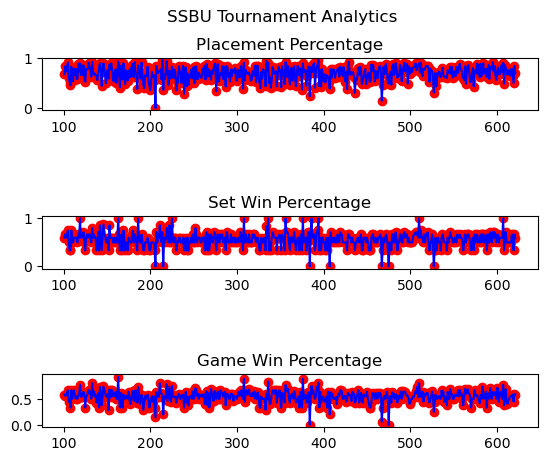

In [11]:
#Basic KPI Graphs

print('Tracking your KPIS and Matchup Data through', len(df['Tournament']),'tournaments:')
print()

fig, axs = plt.subplots(3,1)
fig.suptitle('SSBU Tournament Analytics')
fig.subplots_adjust(wspace= 0.3, hspace= 2)


axs[0].plot(df.Tournament, df.Placement_Pct, color = 'blue')
axs[0].scatter(df.Tournament, df.Placement_Pct, color = 'red')
axs[0].set_title('Placement Percentage')

axs[1].plot(df.Tournament, df.Set_Win_Pct, color = 'blue')
axs[1].scatter(df.Tournament, df.Set_Win_Pct, color = 'red')
axs[1].set_title('Set Win Percentage')

axs[2].plot(df.Tournament, df.Game_Win_Pct, color = 'blue')
axs[2].scatter(df.Tournament, df.Game_Win_Pct, color = 'red')
axs[2].set_title('Game Win Percentage')

In [12]:
#Correlation Matrix
df2 = df.copy(deep = True)
df2 = df2.drop(columns=['Chars_Won', 'Chars_Lost', 'Chars_All'])
corrs = df2.corr()
corrs

,Unnamed: 0,Tournament,Placement,Participants,DQ_Wins,Winning_Sets,Losing_Sets,Games_Won,Games_Lost,Game_3+,Sweeps,Tourney_Win,Offline,Top_8,Placement_Pct,Set_Win_Pct,Game_Win_Pct,Set_Win_Rat,Game_Win_Rat
Unnamed: 0,1.000000,0.999999,-0.030738,0.026889,-0.091199,-0.005295,0.074403,-0.013147,0.036376,0.013688,0.006519,-0.097926,NaN,0.040605,0.081669,-0.018878,-0.006939,-0.067842,-0.044738
Tournament,0.999999,1.000000,-0.030811,0.026793,-0.091221,-0.005209,0.074336,-0.013040,0.036426,0.013852,0.006434,-0.097870,NaN,0.040745,0.081747,-0.018784,-0.006881,-0.067755,-0.044688
Placement,-0.030738,-0.030811,1.000000,0.826169,0.102934,-0.130472,0.064843,-0.061794,0.075018,-0.017250,-0.092796,-0.069360,NaN,-0.266541,-0.099573,-0.142612,-0.122651,-0.115920,-0.095644
Participants,0.026889,0.026793,0.826169,1.000000,0.081256,0.022573,0.031912,0.053854,0.124114,0.070449,-0.031120,-0.046986,NaN,-0.184254,0.089187,0.005168,-0.020540,0.008135,-0.031751
DQ_Wins,-0.091199,-0.091221,0.102934,0.081256,1.000000,-0.073420,0.022484,-0.054081,0.036676,-0.000704,-0.064940,0.013706,NaN,-0.072471,0.037751,-0.082876,-0.101835,-0.073784,-0.050733
Winning_Sets,-0.005295,-0.005209,-0.130472,0.022573,-0.073420,1.000000,-0.312666,0.910264,0.305478,0.407404,0.521530,0.277407,NaN,0.498391,0.785363,0.891863,0.764170,0.904879,0.565266
Losing_Sets,0.074403,0.074336,0.064843,0.031912,0.022484,-0.312666,1.000000,-0.319515,0.400606,-0.036387,0.047759,-0.759441,NaN,-0.169473,-0.384062,-0.586991,-0.500238,-0.426156,-0.614727
Games_Won,-0.013147,-0.013040,-0.061794,0.053854,-0.054081,0.910264,-0.319515,1.000000,0.415396,0.580797,0.272928,0.336932,NaN,0.487216,0.691883,0.818192,0.764691,0.861981,0.565692
Games_Lost,0.036376,0.036426,0.075018,0.124114,0.036676,0.305478,0.400606,0.415396,1.000000,0.635813,-0.143236,-0.159938,NaN,0.292174,0.211247,0.101205,-0.145580,0.315261,-0.244718
Game_3+,0.013688,0.013852,-0.017250,0.070449,-0.000704,0.407404,-0.036387,0.580797,0.635813,1.000000,-0.514501,0.085991,NaN,0.314960,0.340365,0.332714,0.246845,0.375806,0.094790


In [13]:
#KPI Report
print("Average Placement Percentage:", round(np.mean(df2.Placement_Pct),3))
print("Set Win Percentage:", round(sum(df2.Winning_Sets)/(sum(df2.Winning_Sets) + sum(df2.Losing_Sets)), 3))
print("Game Win Percentage:", round(sum(df2.Games_Won)/(sum(df2.Games_Won) + sum(df2.Games_Lost)),3))
print("Average Number of Game-3+'s:", round(np.mean(df2['Game_3+']), 3))

Average Placement Percentage: 0.698
Set Win Percentage: 0.585
Game Win Percentage: 0.565
Average Number of Game-3+'s: 1.766


<h3>Visual Station 2 (Individual Metric Graphs)</h3>

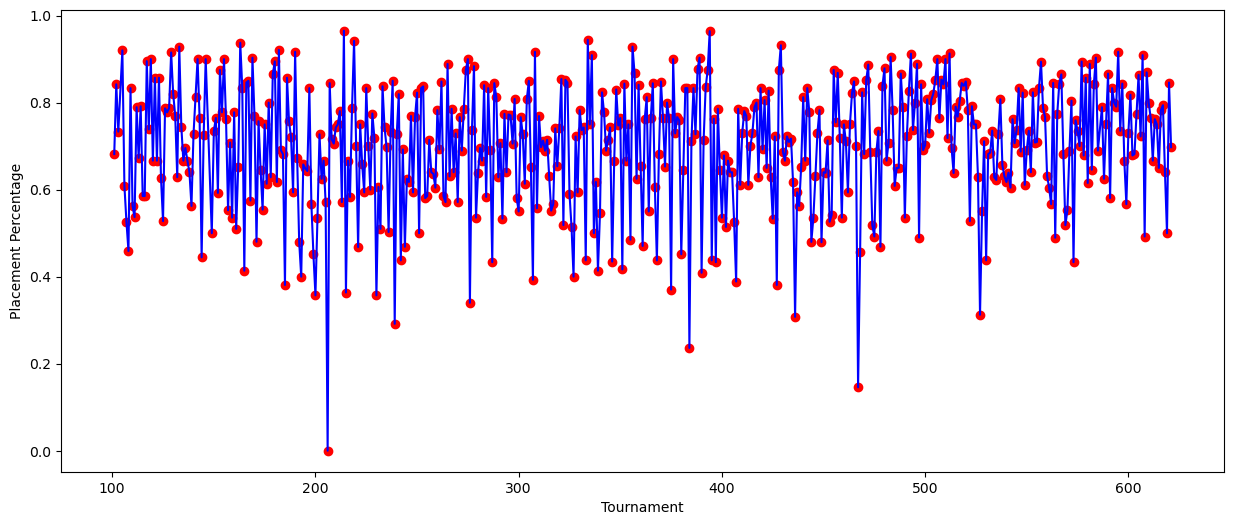

In [15]:
#Individual Graphs

plt.figure(figsize=(15, 6))
plt.plot(df.Tournament, df.Placement_Pct, color = 'blue')
plt.scatter(df.Tournament, df.Placement_Pct, color = 'red')
plt.ylabel('Placement Percentage')
plt.xlabel('Tournament')        
plt.show()

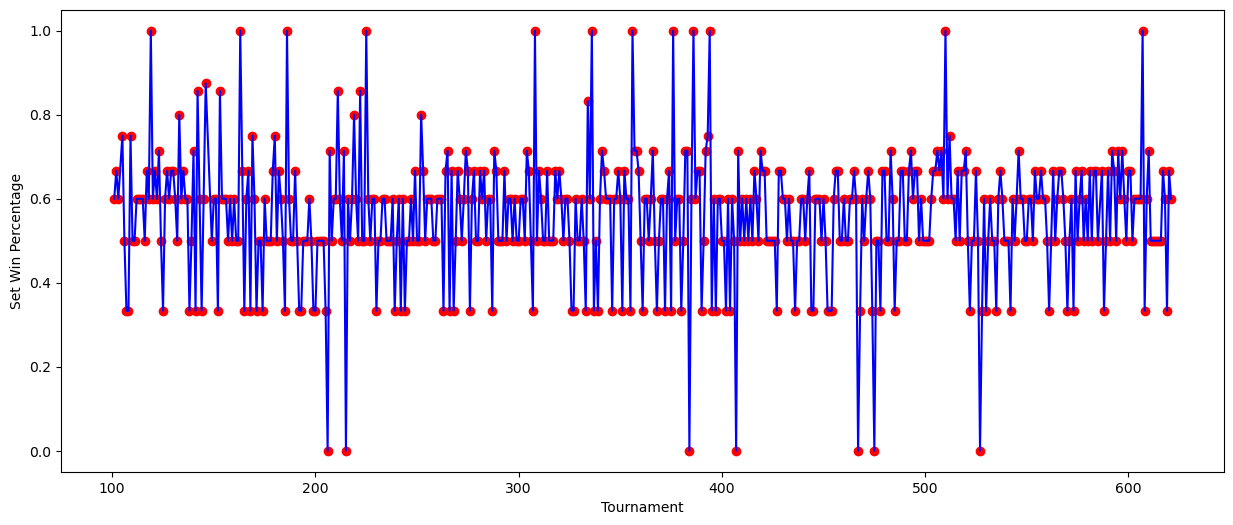

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(df.Tournament, df.Set_Win_Pct, color = 'blue')
plt.scatter(df.Tournament, df.Set_Win_Pct, color = 'red')
plt.ylabel('Set Win Percentage')
plt.xlabel('Tournament')        
plt.show()

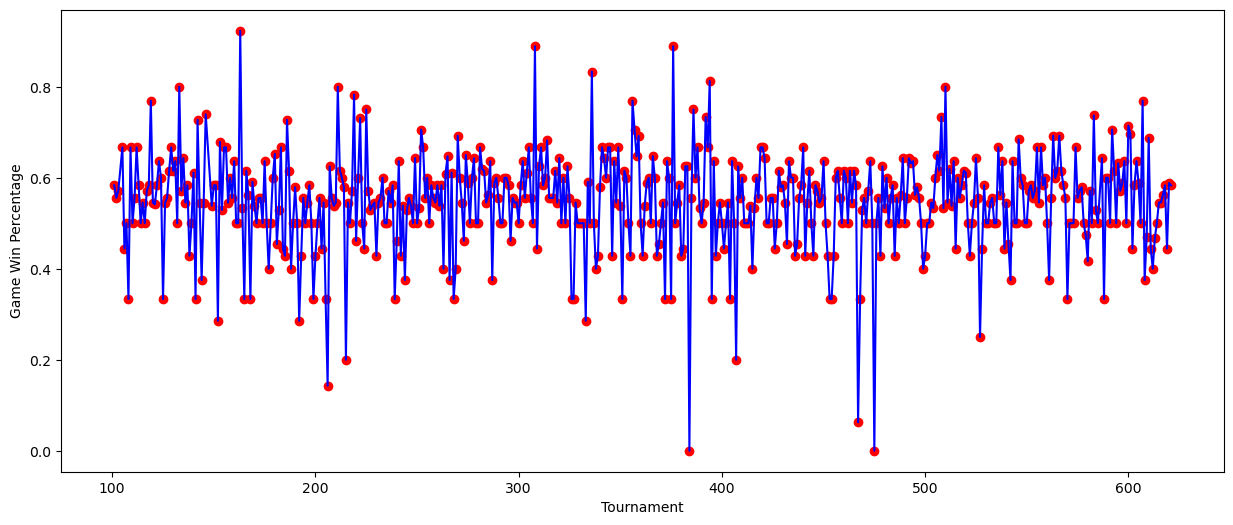

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df.Tournament, df.Game_Win_Pct, color = 'blue')
plt.scatter(df.Tournament, df.Game_Win_Pct, color = 'red')
plt.ylabel('Game Win Percentage')
plt.xlabel('Tournament')        
plt.show()

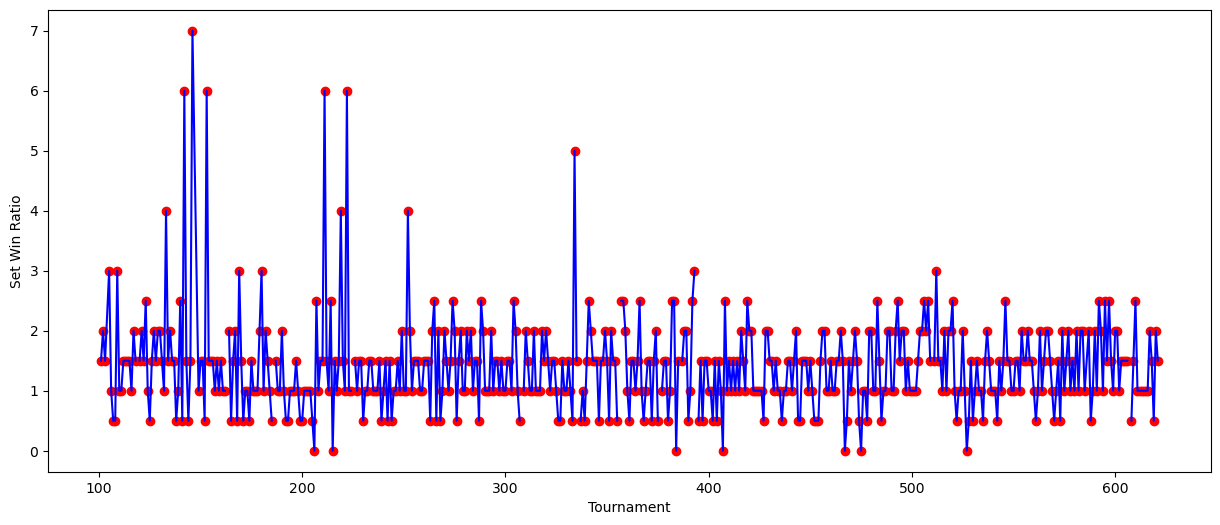

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df.Tournament, df.Set_Win_Rat, color = 'blue')
plt.scatter(df.Tournament, df.Set_Win_Rat, color = 'red')
plt.ylabel('Set Win Ratio')
plt.xlabel('Tournament')        
plt.show()

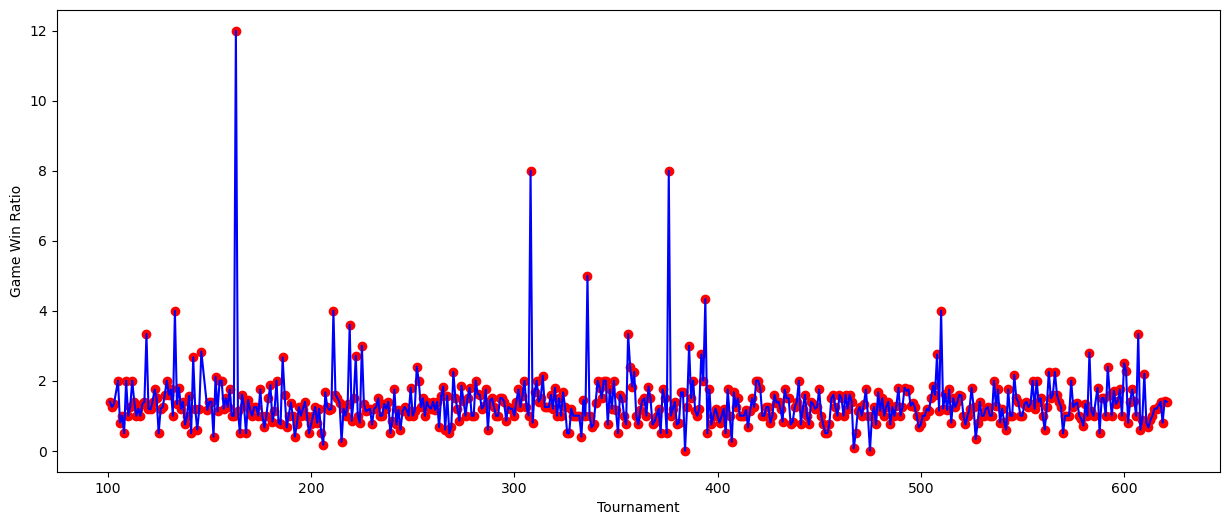

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(df.Tournament, df.Game_Win_Rat, color = 'blue')
plt.scatter(df.Tournament, df.Game_Win_Rat, color = 'red')
plt.ylabel('Game Win Ratio')
plt.xlabel('Tournament')        
plt.show()

<h3> Character Matchup Visualization</h3>

In [21]:
wins_dict = dict()

for chars in df['Chars_Won']:
    for c in chars:
        if c not in wins_dict:
            wins_dict[c] = 1
        else:
            wins_dict[c] += 1
            
losses_dict = dict()

for chars in df['Chars_Lost']:
    for c in chars:
        if c not in losses_dict:
            losses_dict[c] = 1
        else:
            losses_dict[c] += 1

percentage_dict = dict()

for w in wins_dict.keys():
    if w in losses_dict:
        percentage_dict[w] = round(wins_dict[w]/(wins_dict[w] + losses_dict[w]), 3)
    else:
        percentage_dict[w] = 1
        
for l in losses_dict.keys():
    if l not in wins_dict:
        percentage_dict[l] = 0
        

percentage_dict.pop('None')
sorted_p = dict(sorted(percentage_dict.items(), key = operator.itemgetter(1), reverse = True))

In [22]:
#color-coding our character matchup graph
col = []
for val in sorted_p.values():
    if val > 0.5:
        col.append('green')
    elif val == 0.5:
        col.append('blue')
    else:
        col.append('grey')

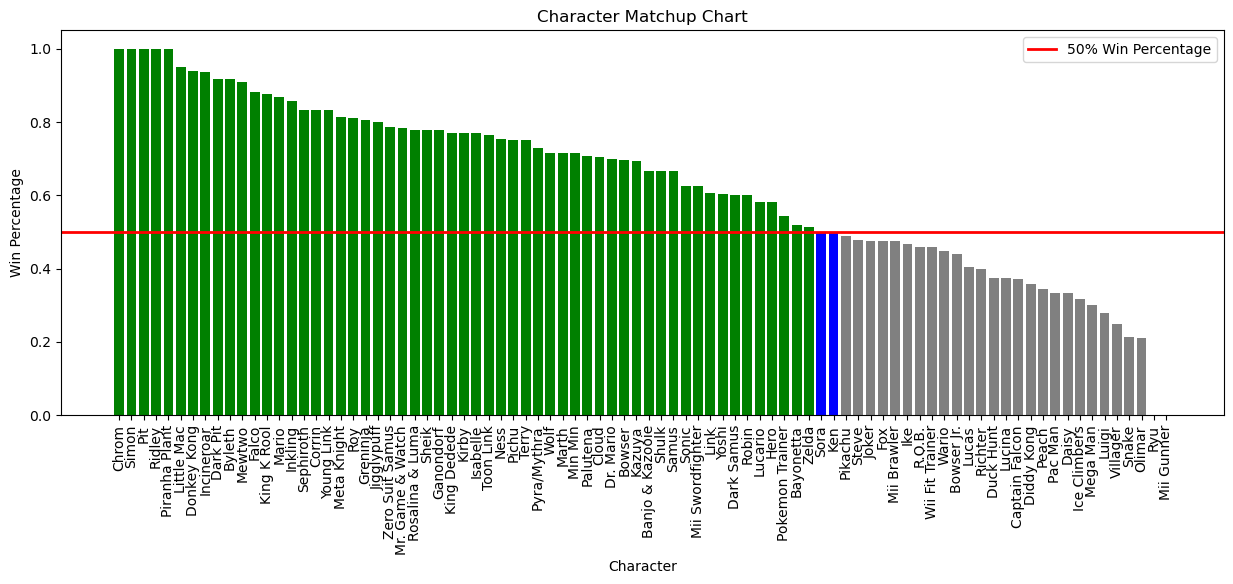

In [23]:
fig, ax = plt.subplots(1,1, figsize = (15,5))
fig.subplots_adjust(wspace= 80, hspace= 0.3)

plt.axhline(0.5, 0, len(sorted_p), color='red', linewidth=2, label = "50% Win Percentage")
plt.bar(sorted_p.keys(), sorted_p.values(), color = col)
plt.xlabel("Character")
plt.xticks(rotation=90)
plt.ylabel("Win Percentage")
plt.title("Character Matchup Chart")
plt.legend()
plt.show()

In [24]:
sorted_p

{'Chrom': 1,
 'Simon': 1,
 'Pit': 1,
 'Ridley': 1,
 'Piranha Plant': 1,
 'Little Mac': 0.95,
 'Donkey Kong': 0.938,
 'Incineroar': 0.935,
 'Dark Pit': 0.917,
 'Byleth': 0.917,
 'Mewtwo': 0.909,
 'Falco': 0.881,
 'King K Rool': 0.875,
 'Mario': 0.867,
 'Inkling': 0.857,
 'Sephiroth': 0.833,
 'Corrin': 0.833,
 'Young Link': 0.833,
 'Meta Knight': 0.812,
 'Roy': 0.81,
 'Greninja': 0.806,
 'Jigglypuff': 0.8,
 'Zero Suit Samus': 0.786,
 'Mr. Game & Watch': 0.783,
 'Rosalina & Luma': 0.778,
 'Sheik': 0.778,
 'Ganondorf': 0.778,
 'King Dedede': 0.771,
 'Kirby': 0.77,
 'Isabelle': 0.769,
 'Toon Link': 0.763,
 'Ness': 0.754,
 'Pichu': 0.75,
 'Terry': 0.75,
 'Pyra/Mythra': 0.728,
 'Wolf': 0.714,
 'Marth': 0.714,
 'Min Min': 0.714,
 'Palutena': 0.706,
 'Cloud': 0.703,
 'Dr. Mario': 0.7,
 'Bowser': 0.696,
 'Kazuya': 0.692,
 'Banjo & Kazooie': 0.667,
 'Shulk': 0.667,
 'Samus': 0.667,
 'Sonic': 0.625,
 'Mii Swordfighter': 0.625,
 'Link': 0.607,
 'Yoshi': 0.604,
 'Dark Samus': 0.6,
 'Robin': 0.6,
 'L